In [1]:
from utils import *
from typing import Tuple, List
import random as rand

In [2]:
%matplotlib notebook

# Generowanie punktów

In [3]:
def generate(x_span: Tuple[float, float], y_span: Tuple[float, float], total: int) -> List[List[Tuple[float, float]]]:
    def random_point(x_span, top_right):
        return (rand.uniform(x_span[0], x_span[1]), rand.uniform(y_span[0], y_span[1]))
    
    points = set()
    result = []
    while total > 0:
        start, end = random_point(x_span, y_span), random_point(x_span, y_span)
        if (start in points) or (end in points):
            continue
        if start[0] == end[0]:
            continue
        result.append([start, end])
        points.add(start)
        points.add(end)
        total -= 1
    return result

<IPython.core.display.Javascript object>


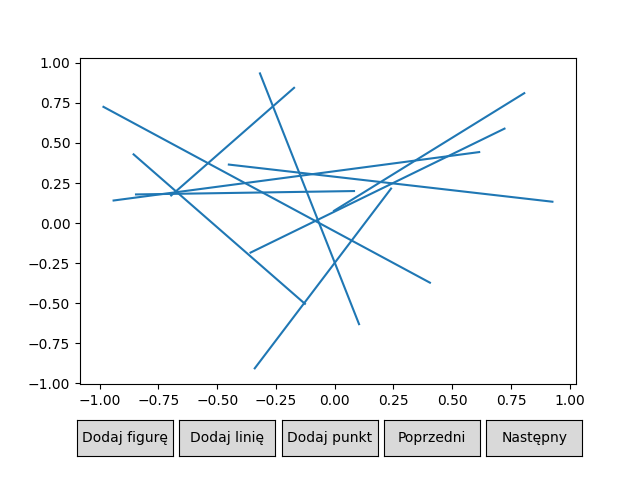

In [4]:
segments = generate((-1, 1), (-1, 1), 10)
plot = Plot([Scene(lines=[LinesCollection(segments)])])
plot.draw()

# Dynamiczne dodawanie punktów

In [5]:
def get_lines_from_plot(plot):
    if len(plot.get_added_lines()) > 0:
        return plot.get_added_lines()[0].lines
    else:
        return []

W wykresie poniżej można dodać linie za pomoca przycisku `Dodaj linię`

<IPython.core.display.Javascript object>


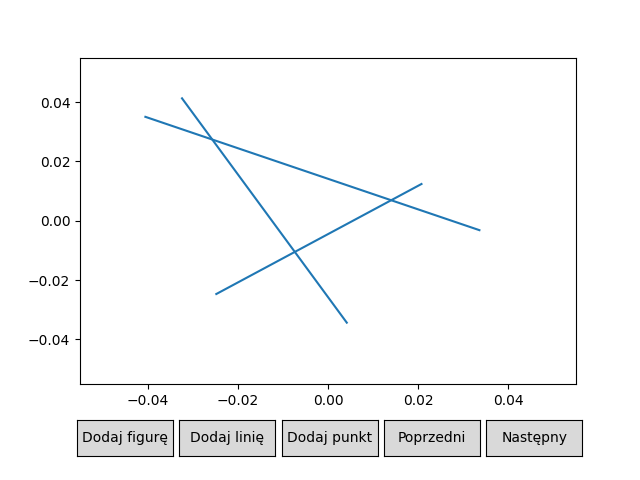

In [6]:
plot = Plot([Scene()])
plot.draw()

In [7]:
for line in get_lines_from_plot(plot)[:3]:
    print(line)
print("...")

[(-0.024971775547150653, -0.02483762254901961), (0.020935482517365475, 0.012570465686274526)]
[(-0.04071774328908614, 0.03515012254901963), (0.03379838574317193, -0.0032689950980392124)]
[(0.004302418001236444, -0.0346109068627451), (-0.03251209812779581, 0.04155330882352942)]
...


# Obliczanie przecięcia
Poniższy kod oblicza przecięcie między dwoma odcinkami

In [10]:
def det(a,b,c):
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-c[0]*b[1]-a[1]*b[0]-a[0]*c[1]

In [11]:
def on_segment(start, end, point):
    """Check if point lies on a segment from start to end"""
    return min(start[0], end[0]) <= point[0] and point[0] <= max(start[0], end[0]) and min(start[1], end[1]) <= point[1] and point[1] <= max(start[1],end[1])

In [18]:
def do_intersect(segment_a, segment_b, tolerance = 0):
    p1 = segment_a[0]
    p2 = segment_a[1]
    p3 = segment_b[0]
    p4 = segment_b[1]
    d1 = det(p3,p4,p1)
    d2 = det(p3,p4,p2)
    d3 = det(p1,p2,p3)
    d4 = det(p1,p2,p4)
    
    if ((d1 > tolerance and d2 < -tolerance) or (d1 < -tolerance and d2 > tolerance)) and ((d3 > tolerance and d4 < -tolerance) or (d3 < -tolerance and d4 > tolerance)):
        return True
    if (d1 >= -tolerance and d1 <= tolerance) and on_segment(p3,p4,p1):
        return True
    if (d2 >= -tolerance and d2 <= tolerance) and on_segment(p3,p4,p2):
        return True
    if (d3 >= --tolerance and d3 <= tolerance) and on_segment(p1,p2,p3):
        return True
    return (d4 >= -tolerance and d4 <= tolerance) and on_segment(p1,p2,p4)

In [13]:
def find_intersect(segment_a: List[Tuple[float, float]], segment_b: List[Tuple[float, float]]) -> Tuple[float, float]:
    """This function works only assuming that there are no vertical lines."""
    a_start, a_end = tuple(segment_a)
    b_start, b_end = tuple(segment_b)
    
    a_slope = (a_end[1] - a_start[1]) / (a_end[0] - a_start[0]) 
    b_slope = (b_end[1] - b_start[1]) / (b_end[0] - b_start[0]) 
    
    a_const = a_start[1] - a_slope * a_start[0]
    b_const = b_start[1] - b_slope * b_start[0]
    
    x = (b_const - a_const) / (a_slope - b_slope)
    y = a_slope * x + a_const
    return (x, y)

# Naiwny algorytm szukania przecięć

In [14]:
def find_intersects(segments: List[List[Tuple[float, float]]]) -> List[Tuple[float, float]]:
    intersections = []
    for i in range(0, len(segments)):
        for j in range(i+1, len(segments)):
            if do_intersect(segments[i], segments[j]):
                intersections.append(find_intersect(segments[i], segments[j]))
    return intersections

<IPython.core.display.Javascript object>


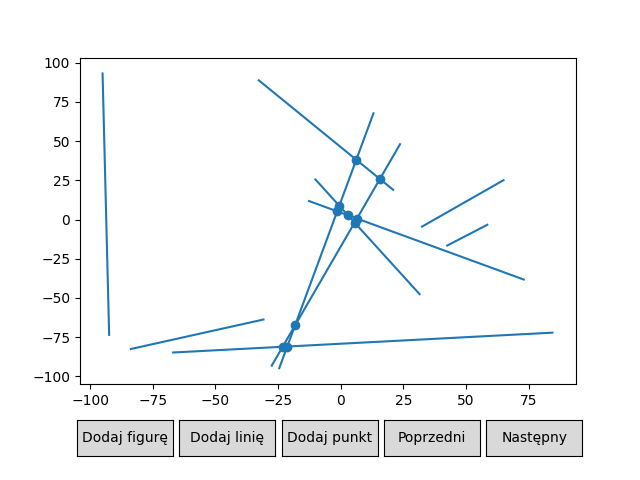

In [24]:
segments = generate((-100, 100), (-100, 100), 10)
intersects = find_intersects(segments)
plot = Plot([Scene(points=[PointsCollection(intersects)], lines=[LinesCollection(segments)])])
plot.draw()